sklearn: <br>
<b>supervised learning</b>, in which the data comes with additional attributes that we want to predict<br>
*it can be classification problem like digits recognition or it can be regression problem length of catterpillar according to age<br>

<b>unsupervised learning</b>, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization

##### loading dataset
A dataset is a dictionary-like object that holds all the data and some metadata about the data.This data is stored in the <b>.data member</b>, which is a n_samples, n_features array. In the case of supervised problem, one or more response variables are stored in the <b>.target</b> member which gives digits.target gives the ground truth.

In [22]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris_dataset = datasets.load_iris() #iris_dataset.data and iris_dataset.target
digits = datasets.load_digits()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

In [24]:
#You used plotly to visualize the data 

#now we use knn to model the data

from sklearn.neighbors import KNeighborsClassifier#---> only stores the training data
knn = KNeighborsClassifier(n_neighbors=1)    #knn encapsulates the algorithm and info algorithm extracts from training data.


knn.fit(X_train, y_train)# ---> To build the model on the training set, we call the fit method of the knn object,
# which takes as arguments the NumPy array X_train containing the training data and
# the NumPy array y_train of the corresponding training labels



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [25]:
#to test it with a simple array we use X_new 
import numpy as np
X_new =np.array([[5,2.9,1,0.2]])
prediction = knn.predict(X_new)
prediction # gives the prediction for the X_new according to the knn model trained by X_train and Y_train
iris_dataset['target_names'][prediction] #from the iris_dataset we extract the name of the target code given by prediction

array(['setosa'], dtype='<U10')

In [26]:
#Evaluation of the model use of X_test and y_test
y_pred = knn.predict(X_test)
print(np.mean(y_pred==y_test)) #we predict for X_test using the model and then compare with the y_test---> their mean gives the the percentage of the correctness of the model
#in place of mean of numpy we can use score method on directly on X_test and y_test to get the same thing
print("{:.2f}".format(knn.score(X_test,y_test)))

0.9736842105263158
0.97


## chapter 2 Supervised learning
Remember that supervised learning is used whenever we want to predict a certain
outcome from a given input, and we have examples of input/output pairs.<br>
<br>
In classification, the goal is to predict a class label, which is a choice from a predefined
list of possibilities.(iris dataset example was demonstration of the classification problem)<br>
<br>

For regression tasks, the goal is to predict a continuous number, or a floating-point
number in programming terms (or real number in mathematical terms).<br>

if a model is able to make accurate predictions on
unseen data, we say it is able to <b>generalize</b> from the training set to the test set.
<br>

<b>Overfitting</b>
occurs when you fit a model too closely to the particularities of the training set and
obtain a model that works well on the training set but is not able to generalize to new
data.<br>

you might not be able to capture all the aspects of and vari‐
ability in the data, and your model will do badly even on the training set. Choosing
too simple a model is called <b>underfitting</b>.

The more complex we allow our model to be, the better we will be able to predict on
the training data. However, if our model becomes too complex, we start focusing too
much on each individual data point in our training set, and the model will not gener‐
alize well to new data.

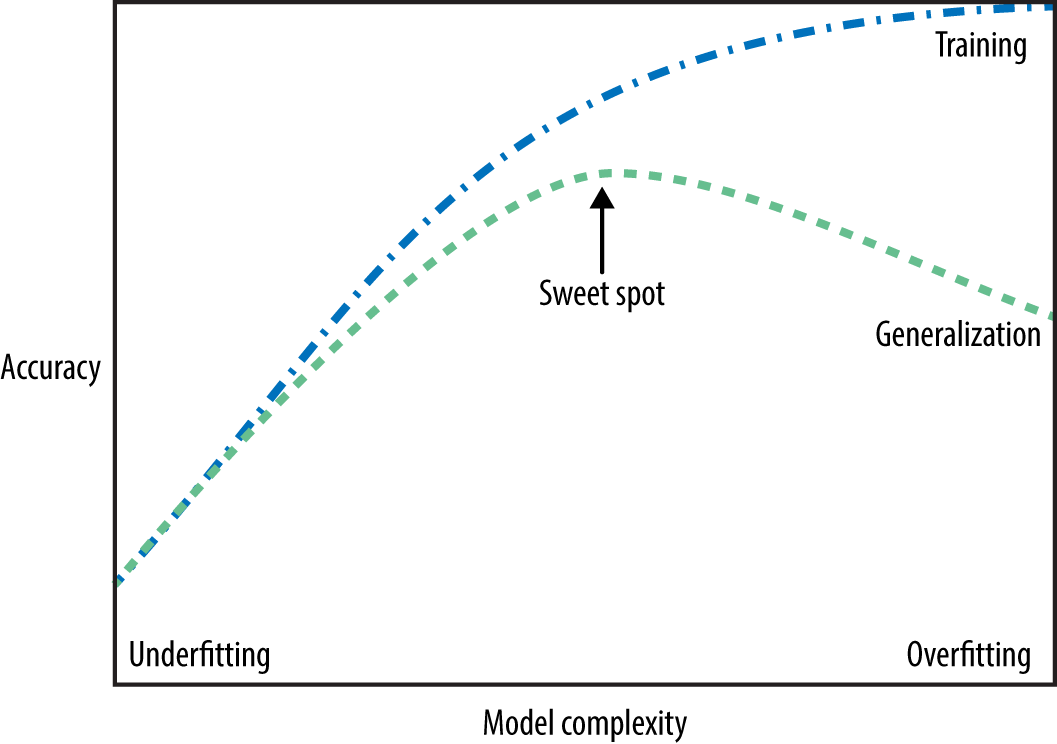

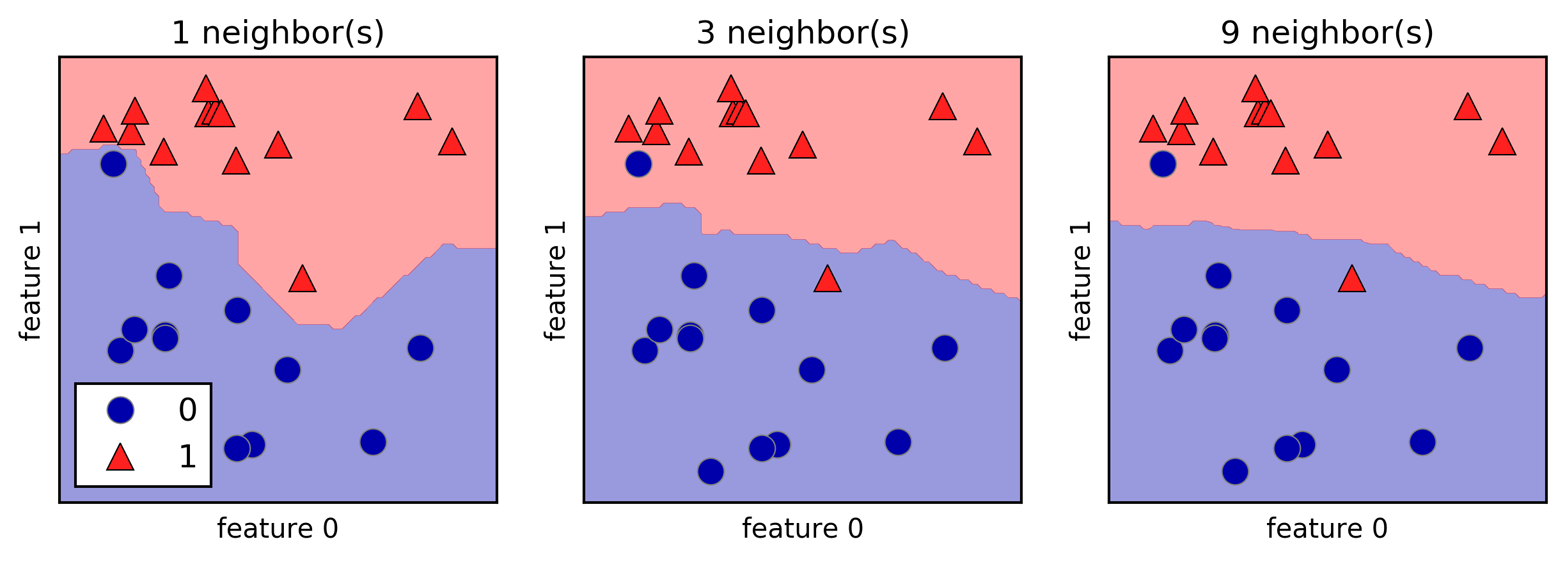

A smoother boundary corresponds to a
simpler model. In other words, using few neighbors corresponds to high model com‐
plexity (as shown on the right side of Figure 2-1), and using many neighbors corre‐
sponds to low model complexity



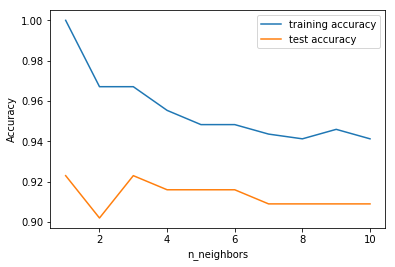

In [28]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer['data'],cancer['target'],random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors= n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings,training_accuracy,label='training accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### linear regression
Linear models for regression
For regression, the general prediction formula for a linear model looks as follows:
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b
<br><br>
Linear regression, or ordinary least squares (OLS), is the simplest and most classic lin‐
ear method for regression. Linear regression finds the parameters w and b that mini‐
mize the mean squared error between predictions and the true regression targets, y,
on the training set.
<br><br>
In ridge regression,
though, the coefficients (w) are chosen not only so that they predict well on the train‐
ing data, but also to fit an additional constraint.<br>
The weights are close to 0 to make as much less effect as possible and still making a good prediction. This is known as <b> Regularization</b>
<br>
How much importance the
model places on simplicity versus training set performance can be specified by the
user, using the alpha parameter.<br>
<br>
A
higher alpha means a more restricted model, so we expect the entries of coef_ to
have smaller magnitude for a high value of alpha than for a low value of alpha .
<br><br>
Because ridge is regularized, the training
score of ridge is lower than the training score for linear regression across the board.
However, the test score for ridge is better, particularly for small subsets of the data.

<br><br>
As more
and more data becomes available to the model, both models improve, and linear
regression catches up with ridge in the end. The lesson here is that with enough train‐
ing data, regularization becomes less important, and given enough data, ridge and linear regression will have same performance.
<br><br>

<b>Lasso</b> is alterantive to ridge and regularization, restricting coefficients is done but in a little different way.(L1 regularization) some coefficients are exactly zero.
<br><br>
A lower alpha allowed us to fit a more complex model, which worked better on the
training and test data. The performance is slightly better than using Ridge , and we are
using only 33 of the 105 features. This makes this model potentially easier to under‐
stand(case alpha 0.01)
<br><br>
but setting alpha really low (0.0001) will overfit the model and makes it similar to linearregression.
<br><br>

<b>Linear models for classification</b>
Linear models are also extensively used for classification. Let’s look at binary classifi‐
cation first. In this case, a prediction is made using the following formula:
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0


<br><br>
The two most common linear classification algorithms are <i><b>logistic regression</i></b>, implemented in linear_model.LogisticRegression , and <i><b>linear support vector machines
(linear SVMs)</i></b>, implemented in svm.LinearSVC (SVC stands for support vector classifier).

<br><br>
LogisticRegression is classification algo.


#### Naive bayes classifiers
similar to linear models but are faster in training.<br>
naive Bayes models are so efficient is that they learn parameters by
looking at each feature individually and collect simple per-class statistics from each
feature.<br>
GaussianNB , BernoulliNB , and MultinomialNB . GaussianNB are some sklearn Naive bayes classifiers.
<br><br>

BernoulliNB , and MultinomialN are used mostly in text data classification

#### Decision trees
concept if else trees<br>
recursive process yields a binary tree of decisions, with each node containing a
test.<br>
But in this case the overfitting occurs as the data has been if elsed to each case to individual nodes.
<br>
There are two common strategies to prevent overfitting: stopping the creation of the
tree early (also called pre-pruning), or building the tree but then removing or collaps‐
ing nodes that contain little information (also called post-pruning or just pruning).
<br><br>
Decision trees in scikit-learn are implemented in the DecisionTreeRegressor and
DecisionTreeClassifier classes. scikit-learn only implements pre-pruning, not
post-pruning.
<br><br>
Feature importance in trees--> The most commonly
used summary is feature importance, which rates how important each feature is for
the decision a tree makes.<br><br>
The tree
has no ability to generate “new” responses, outside of what was seen in the training
data. This shortcoming applies to all models based on trees.
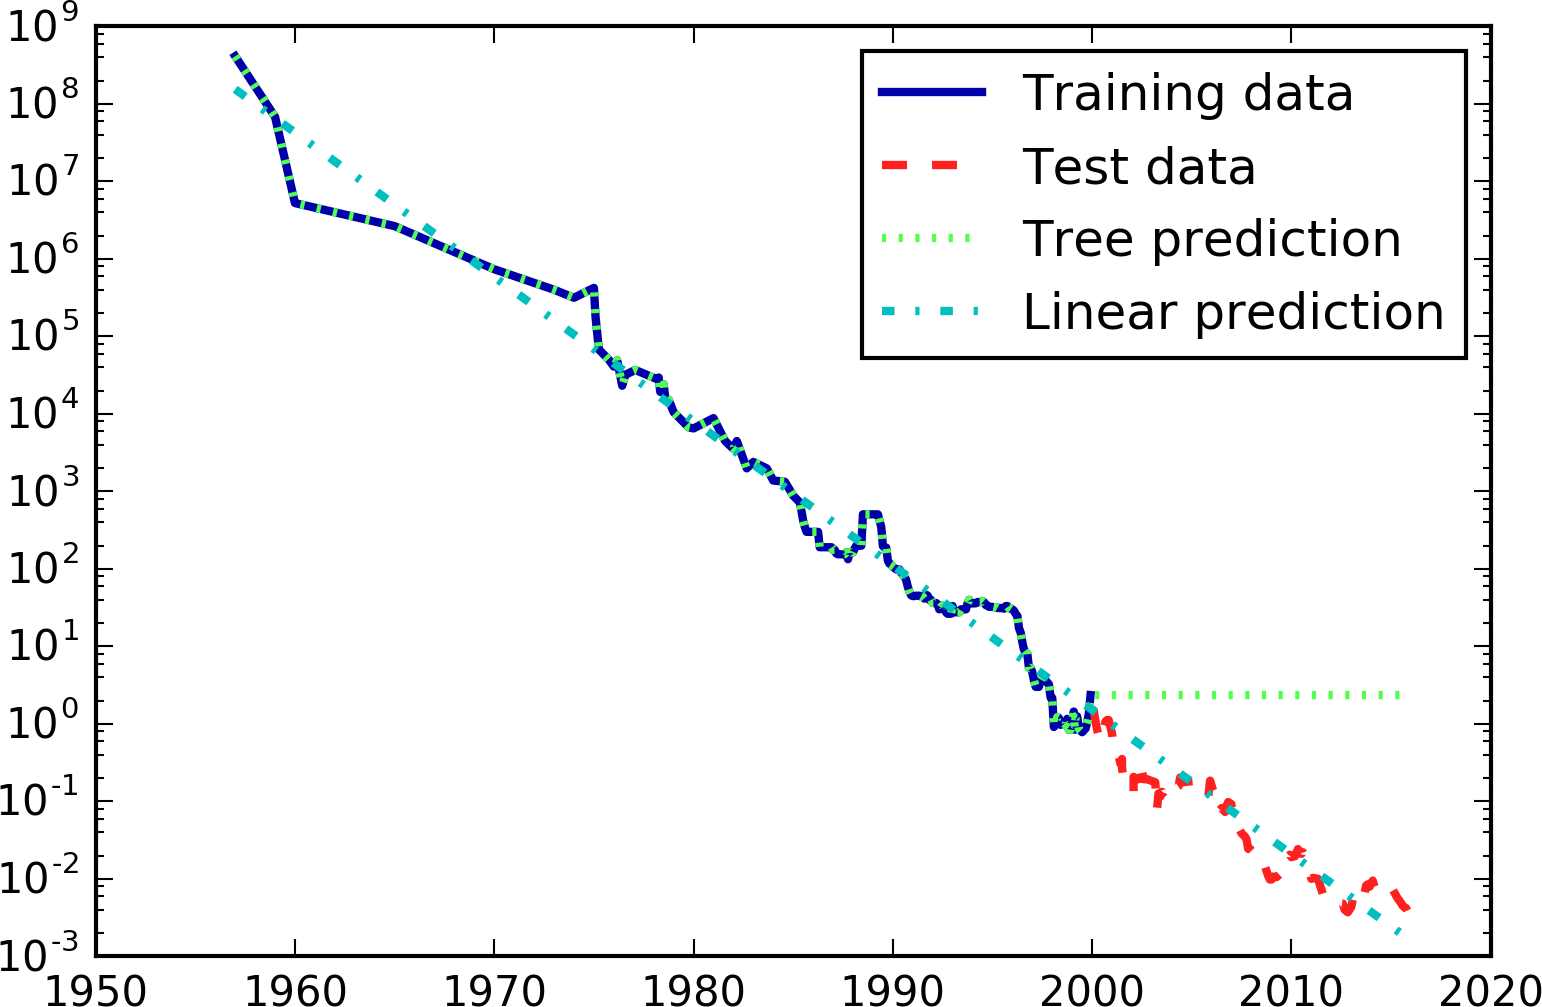

The main downside of decision trees is that even with the use of pre-pruning, they
tend to overfit and provide poor generalization performance.

#### Ensembles of Decision trees

Ensembles are methods that combine multiple machine learning models to create
more powerful models.<br><br>
for trees <b>random forests</b> and <b>gradient boosted decision trees.</b>
<br><br>
##### Random forests:
A random forest
is essentially a collection of decision trees, where each tree is slightly different from
the others. The idea behind random forests is that each tree might do a relatively
good job of predicting, but will likely overfit on part of the data. If we build many
trees, all of which work well and overfit in different ways, we can reduce the amount
of overfitting by averaging their results.<br><br>

we build the bootstrap sample of our data. Randomly choosing one sample with replacement(can be used more than once) nsamples. we get a dataset as big as our dataset<br>
let’s say we want to create a bootstrap sample of the list ['a', 'b',
'c', 'd'] . A possible bootstrap sample would be ['b', 'd', 'd', 'c'] . Another
possible sample would be ['d', 'a', 'd', 'a'] .<br><br>

Next, a decision tree is made but with slight change. Instead of looking for
the best test for each node, in each node the algorithm randomly selects a subset of
the features, and it looks for the best possible test involving one of these features.
<br><br>
bootstrap sampling leads to each decision tree in the random forest being built
on a slightly different dataset. Because of the selection of features in each node, each
split in each tree operates on a different subset of features. Together, these two mech‐
anisms ensure that all the trees in the random forest are different.

<br><br>
While building random forests on large data‐
sets might be somewhat time consuming, it can be parallelized across multiple CPU cores within a computer easily. If you are using a multi-core processor (as nearly all
modern computers do), you can use the n_jobs parameter to adjust the number of
cores to use.You can set n_jobs=-1 to use all the cores in
your computer.

<br><br>
n_estimators store the random trees, the more the better<br>
max_features determines how random each tree is, and a
smaller max_features reduces overfitting.<br>
max_depth
<br><br>
##### Gradient boosted regression trees (gradient boosting machines)

In contrast to the
random forest approach, gradient boosting works by building trees in a serial man‐
ner, where each tree tries to correct the mistakes of the previous one. By default, there
is no randomization in gradient boosted regression trees; instead, strong pre-pruning
is used. Gradient boosted trees often use very shallow trees, of depth one to five,
which makes the model smaller in terms of memory and makes predictions faster.
<br><br>
By default, 100 trees of maximum depth 3 and a learning rate of 0.1 are used.<br>

learning_rate , which controls how
strongly each tree tries to correct the mistakes of the previous trees. A higher learning
rate means each tree can make stronger corrections, allowing for more complex mod‐
els.<br>
Adding more trees to the ensemble, which can be accomplished by increasing
n_estimators , also increases the model complexity, as the model has more chances
to correct mistakes on the training set.

#### Kernelized Support Vector Machines

lines and planes are less flexible so incresing the dimension can lead to the better work at classification.<br><br>
then say a plane would be able to do the work and representing that in with real features make it look like non linear classification.<br><br>
here comes kernel method handy.

<b>Need to come back here</b>
<br><br>


#### Neural networks
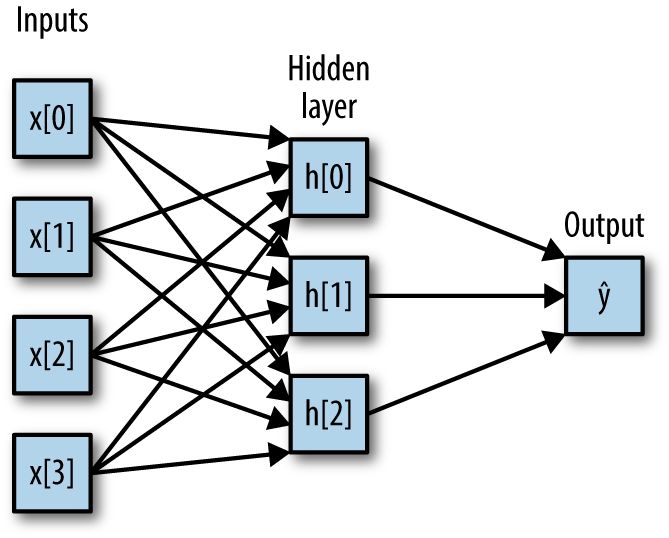


h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])
h[1] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])
h[2] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])
ŷ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2]
<br><br>
a series of weighted sums is mathematically the same as computing just
one weighted sum, so to make this model truly more powerful than a linear model,
we need one extra trick. After computing a weighted sum for each hidden unit, a
nonlinear function is applied to the result—usually the rectifying nonlinearity (also
known as rectified linear unit or relu) or the tangens hyperbolicus (tanh). The result of
this function is then used in the weighted sum that computes the output, ŷ.

<br><br>
An important property of neural networks is that their weights are set randomly
before learning is started, and this random initialization affects the model that is
learned. That means that even when using exactly the same parameters, we can
obtain very different models when using different random seeds.
<br><br>
alpha parameter is used to do the regularization on the weights... more the alpha more the regularization on the weights.<br><br>

'l-bfgs','adam' 'sgd' 


<br><br>

#### Uncertainty Estimates from Classifiers
Another useful part of the scikit-learn interface that we haven’t talked about yet is
the ability of classifiers to provide uncertainty estimates of predictions. Often, you are
not only interested in which class a classifier predicts for a certain test point, but also
how certain it is that this is the right class.